In [1]:
# Install required packages
!pip install -q datasets huggingface-hub pandas numpy matplotlib seaborn plotly polars

print("Installation complete!")

Installation complete!


In [4]:
import os
import sys
import warnings
import shutil

# Suppress all warnings
warnings.filterwarnings('ignore')

# Disable HuggingFace progress bars
os.environ["HF_HUB_DISABLE_PROGRESS_BARS"] = "1"
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "1"
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["HF_HUB_VERBOSITY"] = "error"

# Disable datasets progress bars
from datasets.utils import disable_progress_bar, logging as datasets_logging
disable_progress_bar()
datasets_logging.set_verbosity_error()

# Disable transformers logging
import transformers
transformers.logging.set_verbosity_error()

# Disable tqdm globally
from tqdm import tqdm
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

try:
    from rich import progress
    progress.Progress = lambda *args, **kwargs: None
except:
    pass

# Disable huggingface_hub progress
try:
    from huggingface_hub import logging as hf_logging
    hf_logging.set_verbosity_error()
except:
    pass

print(" All progress bars disabled")


 All progress bars disabled


In [5]:
# Imports
import pandas as pd
import numpy as np
import polars as pl
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("All imports successful!")

All imports successful!


## 1. Load the dataset

In [6]:
from datasets import load_dataset
dataset = load_dataset("calmgoose/amazon-product-data-2020", split="train")

print(f"Dataset loaded!")

Dataset loaded!


In [7]:
# Convert to pandas DataFrame
df_raw = dataset.to_pandas()

print(f"Converted to pandas DataFrame")
print(f"Shape: {df_raw.shape}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Converted to pandas DataFrame
Shape: (10002, 15)
Memory usage: 27.69 MB


In [23]:
# Display first few rows
print("First 5 rows:")
print(df_raw.head())

First 5 rows:
                            Uniq Id  \
0  4c69b61db1fc16e7013b43fc926e502d   
1  66d49bbed043f5be260fa9f7fbff5957   
2  2c55cae269aebf53838484b0d7dd931a   
3  18018b6bc416dab347b1b7db79994afa   
4  e04b990e95bf73bbe6a3fa09785d7cd0   

                                        Product Name  \
0  DB Longboards CoreFlex Crossbow 41" Bamboo Fib...   
1  Electronic Snap Circuits Mini Kits Classpack, ...   
2  3Doodler Create Flexy 3D Printing Filament Ref...   
3  Guillow Airplane Design Studio with Travel Cas...   
4                   Woodstock- Collage 500 pc Puzzle   

                                            Category Upc Ean Code  \
0  Sports & Outdoors | Outdoor Recreation | Skate...         None   
1  Toys & Games | Learning & Education | Science ...         None   
2          Toys & Games | Arts & Crafts | Craft Kits         None   
3  Toys & Games | Hobbies | Models & Model Kits |...         None   
4            Toys & Games | Puzzles | Jigsaw Puzzles         None   


In [10]:
# Display first few rows
print("Last 5 rows:")
df_raw.tail()

Last 5 rows:


,Uniq Id,Product Name,Category,Upc Ean Code,Selling Price,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Product Dimensions,Image,Variants,Product Url,Is Amazon Seller
9997,1a22f23576bfdfe5ed6c887dc117aab6,Remedia Publications REM536B Money Activity Bo...,Toys & Games | Learning & Education | Counting...,None,$9.31,REM536B,None,Product Dimensions: 11 x 8.5 x 0.4 inc...,show up to 2 reviews by default Activities inc...,4.8 ounces,11 x 8.5 x 0.4 inches 1.6 ounces,https://images-na.ssl-images-amazon.com/images...,None,https://www.amazon.com/Remedia-Publications-RE...,Y
9998,e11514dcf1f087887cd5ea0bd646d1fc,Trends International NFL La Chargers HG - Mobi...,Toys & Games | Arts & Crafts,None,$6.99,None,Make sure this fits by entering your model num...,ProductDimensions:3x6.5x0.3inches|ItemWeight:0...,The mobile wallet is made of silicone with str...,0.96 ounces,None,https://images-na.ssl-images-amazon.com/images...,None,https://www.amazon.com/Trends-International-NF...,Y
9999,c00301a38560da2abc89c1f86ce4b267,NewPath Learning 10 Piece Science Owls and Owl...,Office Products | Office & School Supplies | E...,None,$37.95,34-6015,Make sure this fits by entering your model num...,Product Dimensions: 18 x 11.9 x 0.7 in...,show up to 2 reviews by default NewPath Learni...,2.8 pounds,18 x 11.9 x 0.7 inches 2.75 pounds,https://images-na.ssl-images-amazon.com/images...,None,https://www.amazon.com/NewPath-Learning-Scienc...,Y
10000,c2928dbf9796ceba44863a2736afb405,Disney Princess Do It Yourself Braid Set,Toys & Games | Arts & Crafts | Craft Kits,None,$3.58,2888PRST,None,ProductDimensions:7x7x2inches|ItemWeight:6.1ou...,Disney Princess DIY Braid Set | 6.1 ounces (Vi...,6.1 ounces,None,https://images-na.ssl-images-amazon.com/images...,None,https://www.amazon.com/Disney-Princess-Yoursel...,Y
10001,2bb94aefc3467ed83860e0e2712d5f10,"Hasegawa Ladders Lucano Step Ladder, Orange",Home & Kitchen | Furniture | Kids' Furniture |...,None,$152.27,ML2.0-4OR,Make sure this fits by entering your model num...,ProductDimensions:22.8x6x64.2inches|ItemWeight...,Go to your orders and start the return Select ...,20.5 pounds,None,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Hasegawa-Ladders-Lucano...,https://www.amazon.com/Hasegawa-Ladders-Lucano...,Y


In [11]:
# Dataset shape and info
print("Dataset Overview")
print(f"Total Rows: {df_raw.shape[0]:,}")
print(f"Total Columns: {df_raw.shape[1]}")
print(f"Memory Usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n")

# Column names and types
print("Column names and data types")
df_raw.info()

Dataset Overview
Total Rows: 10,002
Total Columns: 15
Memory Usage: 31.69 MB


Column names and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Uniq Id                10002 non-null  object
 1   Product Name           10002 non-null  object
 2   Category               9172 non-null   object
 3   Upc Ean Code           34 non-null     object
 4   Selling Price          9895 non-null   object
 5   Model Number           8230 non-null   object
 6   About Product          9729 non-null   object
 7   Product Specification  8370 non-null   object
 8   Technical Details      9212 non-null   object
 9   Shipping Weight        8864 non-null   object
 10  Product Dimensions     479 non-null    object
 11  Image                  10002 non-null  object
 12  Variants               2478 non-null   object
 13  Product Url   

In [12]:
# Get column names as a list
print("All col names")
columns = df_raw.columns.tolist()
for i, col in enumerate(columns, 1):
    print(f"{i:2d}. {col}")

All col names
 1. Uniq Id
 2. Product Name
 3. Category
 4. Upc Ean Code
 5. Selling Price
 6. Model Number
 7. About Product
 8. Product Specification
 9. Technical Details
10. Shipping Weight
11. Product Dimensions
12. Image
13. Variants
14. Product Url
15. Is Amazon Seller


In [13]:
# Missing values count
print("Missing value analysis")

missing = df_raw.isnull().sum()
missing_pct = (missing / len(df_raw)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df)

Missing value analysis
                   Column  Missing_Count  Missing_Percentage
3            Upc Ean Code           9968           99.660068
10     Product Dimensions           9523           95.210958
12               Variants           7524           75.224955
5            Model Number           1772           17.716457
7   Product Specification           1632           16.316737
9         Shipping Weight           1138           11.377724
2                Category            830            8.298340
8       Technical Details            790            7.898420
6           About Product            273            2.729454
4           Selling Price            107            1.069786
1            Product Name              0            0.000000
0                 Uniq Id              0            0.000000
11                  Image              0            0.000000
13            Product Url              0            0.000000
14       Is Amazon Seller              0            0.000000


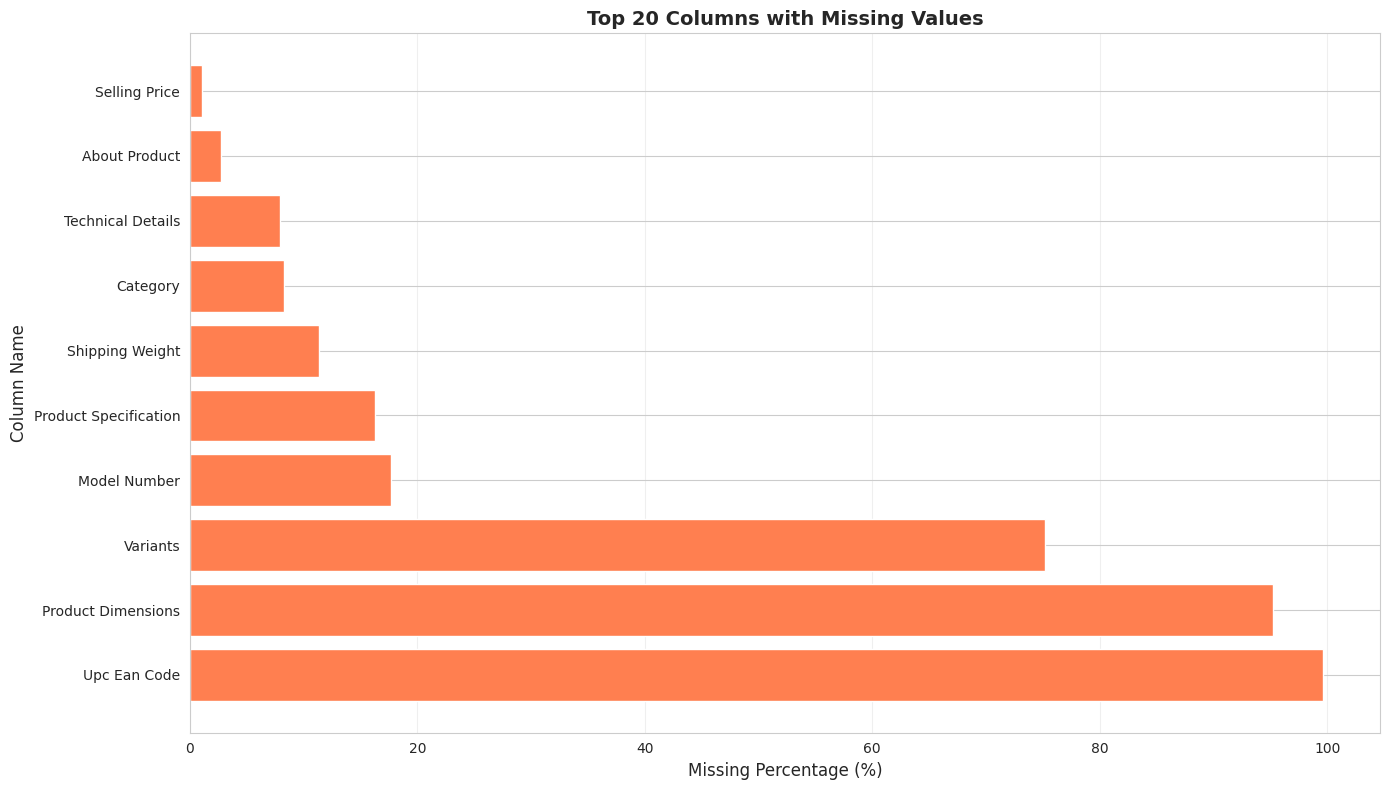

In [14]:
# Visualize missing values
plt.figure(figsize=(14, 8))
missing_cols = missing_df[missing_df['Missing_Count'] > 0].head(20)

plt.barh(missing_cols['Column'], missing_cols['Missing_Percentage'], color='coral')
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Column Name', fontsize=12)
plt.title('Top 20 Columns with Missing Values', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Data types breakdown
print("Data types summary:")

dtype_counts = df_raw.dtypes.value_counts()
print(dtype_counts)
print("\n")

# Group columns by data type
print("Columns by data type")
for dtype in df_raw.dtypes.unique():
    cols = df_raw.select_dtypes(include=[dtype]).columns.tolist()
    print(f"\n{dtype}:")
    for col in cols:
        print(f"  - {col}")

Data types summary:
object    15
Name: count, dtype: int64


Columns by data type

object:
  - Uniq Id
  - Product Name
  - Category
  - Upc Ean Code
  - Selling Price
  - Model Number
  - About Product
  - Product Specification
  - Technical Details
  - Shipping Weight
  - Product Dimensions
  - Image
  - Variants
  - Product Url
  - Is Amazon Seller


In [16]:
# Unique values per column
print("Unique values count per column:")

unique_counts = df_raw.nunique().sort_values(ascending=False)
unique_df = pd.DataFrame({
    'Column': unique_counts.index,
    'Unique_Values': unique_counts.values,
    'Total_Rows': len(df_raw),
    'Uniqueness_Ratio': (unique_counts.values / len(df_raw) * 100).round(2)
})

print(unique_df)

Unique values count per column:
                   Column  Unique_Values  Total_Rows  Uniqueness_Ratio
0                 Uniq Id          10002       10002            100.00
1             Product Url          10002       10002            100.00
2                   Image           9934       10002             99.32
3            Product Name           9930       10002             99.28
4           About Product           9036       10002             90.34
5       Technical Details           8657       10002             86.55
6   Product Specification           8367       10002             83.65
7            Model Number           8109       10002             81.07
8           Selling Price           3876       10002             38.75
9                Variants           2445       10002             24.45
10               Category            938       10002              9.38
11        Shipping Weight            837       10002              8.37
12     Product Dimensions            458     

In [24]:
# Statistical summary for numerical columns
print("STATISTICAL SUMMARY (NUMERICAL COLUMNS)")
print(df_raw.describe())

STATISTICAL SUMMARY (NUMERICAL COLUMNS)
                                 Uniq Id                         Product Name  \
count                              10002                                10002   
unique                             10002                                 9930   
top     2bb94aefc3467ed83860e0e2712d5f10  K2 Skate Men's MOD 110 Inline Skate   
freq                                   1                                    4   

                                                Category  \
count                                               9172   
unique                                               938   
top     Toys & Games | Games & Accessories | Board Games   
freq                                                 284   

                     Upc Ean Code Selling Price Model Number  \
count                          34          9895         8230   
unique                         34          3876         8109   
top     071444764117 735533033354        $19.99            - 

In [22]:
# Analyze categorical columns
print("=" * 80)
print("CATEGORICAL COLUMNS ANALYSIS")
print("=" * 80)

categorical_cols = df_raw.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols[:5]:  # First 5 categorical columns
    print(f"\n{col.upper()}:")
    print("-" * 40)
    print(f"  Unique values: {df_raw[col].nunique():,}")
    print(f"  Most common (top 5):")
    value_counts = df_raw[col].value_counts().head(5)
    for val, count in value_counts.items():
        print(f"    • {val}: {count:,} ({count/len(df_raw)*100:.1f}%)")

CATEGORICAL COLUMNS ANALYSIS

UNIQ ID:
----------------------------------------
  Unique values: 10,002
  Most common (top 5):
    • 2bb94aefc3467ed83860e0e2712d5f10: 1 (0.0%)
    • 4c69b61db1fc16e7013b43fc926e502d: 1 (0.0%)
    • 66d49bbed043f5be260fa9f7fbff5957: 1 (0.0%)
    • 2c55cae269aebf53838484b0d7dd931a: 1 (0.0%)
    • 18018b6bc416dab347b1b7db79994afa: 1 (0.0%)

PRODUCT NAME:
----------------------------------------
  Unique values: 9,930
  Most common (top 5):
    • K2 Skate Men's MOD 110 Inline Skate: 4 (0.0%)
    • Btswim NFL Pool Noodles (Pack of 3): 4 (0.0%)
    • K2 F.I.T. 80 Boa Inline Skates: 3 (0.0%)
    • Skechers Kids Skechers Twinkle Toes Glimmer Backpack Accessory: 3 (0.0%)
    • Amscan Party Supplies, Multicolor: 3 (0.0%)

CATEGORY:
----------------------------------------
  Unique values: 938
  Most common (top 5):
    • Toys & Games | Games & Accessories | Board Games: 284 (2.8%)
    • Toys & Games | Puzzles | Jigsaw Puzzles: 274 (2.7%)
    • Toys & Games | Stuf

In [26]:
# First, let's look at the raw price column
print("Raw price column sample (first 20 non-null values):")
print(df_raw['Selling Price'].dropna().head(20).tolist())

Raw price column sample (first 20 non-null values):
['$237.68', '$99.95', '$34.99', '$28.91', '$17.49', '$18.66', '$29.12', '$97.68', '$12.99', '$38.49', '$18.16', '$84.61', '$33.92', '$14.99', '$4.99', '$34.39', '$12.88', '$117.26', '$9.39', '$17.85']


In [27]:
# Clean the price column
df_raw['price_clean'] = df_raw['Selling Price'].str.replace('$', '').str.replace(',', '')
df_raw['price_clean'] = pd.to_numeric(df_raw['price_clean'], errors='coerce')

print("Price cleaning results:")
print(f"Original non-null count: {df_raw['Selling Price'].notna().sum()}")
print(f"After cleaning non-null count: {df_raw['price_clean'].notna().sum()}")
print(f"Values lost in conversion: {df_raw['Selling Price'].notna().sum() - df_raw['price_clean'].notna().sum()}")

Price cleaning results:
Original non-null count: 9895
After cleaning non-null count: 9510
Values lost in conversion: 385


In [28]:
# Complete price statistics
price_data = df_raw['price_clean'].dropna()

print("Complete Price Analysis")
print(f"\nBasic Stats:")
print(f"Count: {price_data.count():,}")
print(f"Mean: ${price_data.mean():.2f}")
print(f"Median: ${price_data.median():.2f}")
print(f"Std Dev: ${price_data.std():.2f}")
print(f"Min: ${price_data.min():.2f}")
print(f"Max: ${price_data.max():.2f}")

print(f"\nPercentiles:")
for p in [1, 5, 10, 25, 50, 75, 90, 95, 99]:
    print(f"{p}th percentile: ${price_data.quantile(p/100):.2f}")

print(f"\nPrice Range Distribution:")
ranges = [
    (0, 10, "Under $10"),
    (10, 25, "$10-$25"),
    (25, 50, "$25-$50"),
    (50, 100, "$50-$100"),
    (100, 200, "$100-$200"),
    (200, 500, "$200-$500"),
    (500, 1000, "$500-$1000"),
    (1000, float('inf'), "Over $1000")
]

for low, high, label in ranges:
    count = ((price_data >= low) & (price_data < high)).sum()
    pct = (count / len(price_data)) * 100
    print(f"{label:15s}: {count:5,} ({pct:5.2f}%)")

# Outliers analysis
print(f"\nOutliers Analysis:")
print(f"Products > $500: {(price_data > 500).sum():,} ({(price_data > 500).sum()/len(price_data)*100:.2f}%)")
print(f"Products > $1000: {(price_data > 1000).sum():,} ({(price_data > 1000).sum()/len(price_data)*100:.2f}%)")
print(f"Products > $2000: {(price_data > 2000).sum():,} ({(price_data > 2000).sum()/len(price_data)*100:.2f}%)")
print(f"Products < $1: {(price_data < 1).sum():,} ({(price_data < 1).sum()/len(price_data)*100:.2f}%)")

Complete Price Analysis

Basic Stats:
Count: 9,510
Mean: $39.75
Median: $16.95
Std Dev: $134.46
Min: $0.01
Max: $5332.00

Percentiles:
1th percentile: $3.37
5th percentile: $5.02
10th percentile: $6.55
25th percentile: $9.99
50th percentile: $16.95
75th percentile: $29.99
90th percentile: $66.81
95th percentile: $121.45
99th percentile: $399.99

Price Range Distribution:
Under $10      : 2,499 (26.28%)
$10-$25        : 4,105 (43.17%)
$25-$50        : 1,610 (16.93%)
$50-$100       :   697 ( 7.33%)
$100-$200      :   359 ( 3.77%)
$200-$500      :   173 ( 1.82%)
$500-$1000     :    41 ( 0.43%)
Over $1000     :    26 ( 0.27%)

Outliers Analysis:
Products > $500: 67 (0.70%)
Products > $1000: 26 (0.27%)
Products > $2000: 9 (0.09%)
Products < $1: 4 (0.04%)


In [29]:
# Show actual products that are > $500
print("\nProducts priced over $500:")
expensive = df_raw[df_raw['price_clean'] > 500][['Product Name', 'price_clean', 'Category']].sort_values('price_clean', ascending=False)
print(f"Total count: {len(expensive)}")
print("\nTop 20 most expensive:")
print(expensive.head(20).to_string(index=False))


Products priced over $500:
Total count: 67

Top 20 most expensive:
                                                                                                                                 Product Name  price_clean                                                                                                              Category
                                                                                   3B Scientific U100061 Ultrasonic Continuous Wave Generator      5332.00                                                             Toys & Games | Learning & Education | Science Kits & Toys
                       Gorilla Playsets 01-0068-TS Mountaineer Treehouse Wooden Swing Set with Fort Add-On, Timber Shield Posts, and 2 Slides      4199.00                           Toys & Games | Sports & Outdoor Play | Play Sets & Playground Equipment | Play & Swing Sets
                   Gorilla Playsets 01-0050-TS Chateau Treehouse Wooden Swing Set with Timber Shield Posts, Rock 

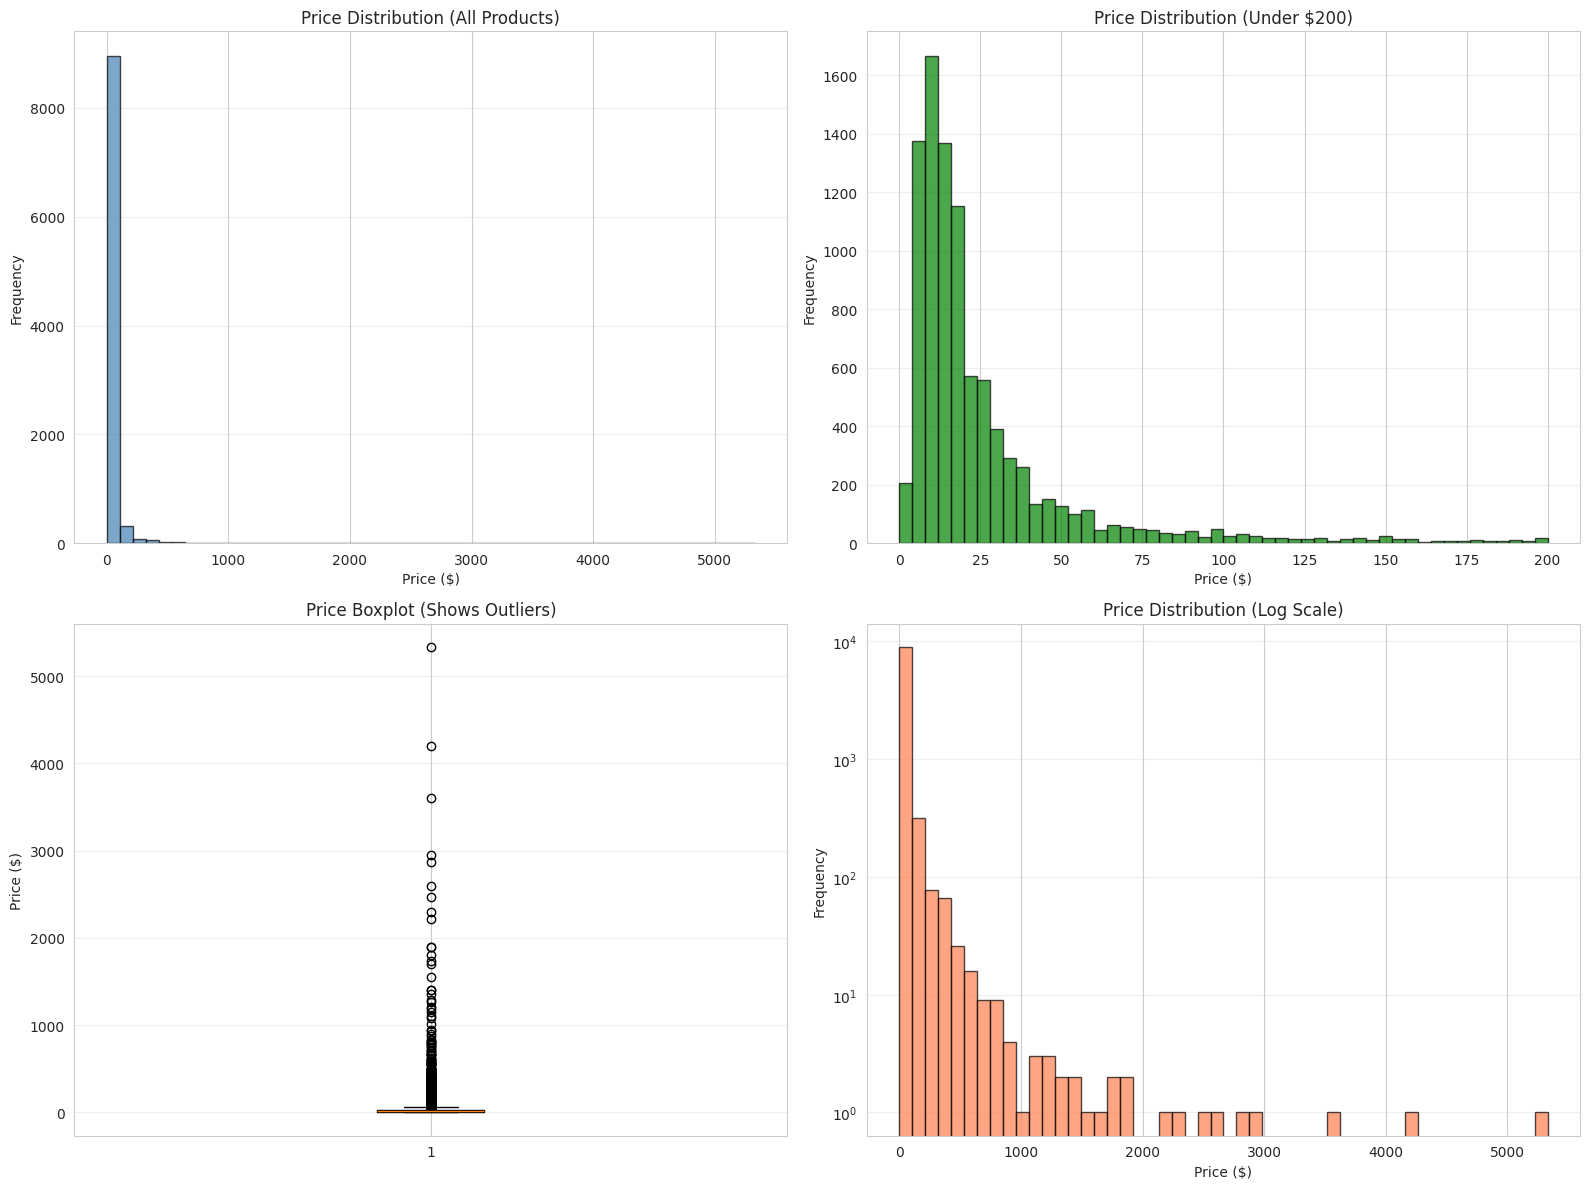

In [30]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram (all data)
axes[0, 0].hist(price_data, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution (All Products)')
axes[0, 0].grid(axis='y', alpha=0.3)

# Histogram (zoomed to common range)
price_common = price_data[price_data <= 200]
axes[0, 1].hist(price_common, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Price ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Price Distribution (Under $200)')
axes[0, 1].grid(axis='y', alpha=0.3)

# Boxplot
axes[1, 0].boxplot(price_data, vert=True)
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Price Boxplot (Shows Outliers)')
axes[1, 0].grid(axis='y', alpha=0.3)

# Log scale histogram
axes[1, 1].hist(price_data, bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Price ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Price Distribution (Log Scale)')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
# Define columns to keep
columns_to_keep = [
    'Uniq Id',
    'Product Name',
    'Category',
    'Selling Price',
    'About Product',
    'Product Specification',
    'Technical Details',
    'Image',
    'Product Url',
    'Is Amazon Seller'
]

# Create cleaned dataframe
df = df_raw[columns_to_keep].copy()

print("Columns dropped successfully")
print(f"Original shape: {df_raw.shape}")
print(f"New shape: {df.shape}")
print(f"Columns removed: {df_raw.shape[1] - df.shape[1]}")
print(f"\nRemaining columns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

Columns dropped successfully
Original shape: (10002, 16)
New shape: (10002, 10)
Columns removed: 6

Remaining columns:
  1. Uniq Id
  2. Product Name
  3. Category
  4. Selling Price
  5. About Product
  6. Product Specification
  7. Technical Details
  8. Image
  9. Product Url
  10. Is Amazon Seller


In [49]:
# Check missing values in our kept columns
print("Missing values analysis after column drop:")
missing_analysis = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Pct': (df.isnull().sum().values / len(df) * 100).round(2)
})
print(missing_analysis.to_string(index=False))

Missing values analysis after column drop:
               Column  Missing_Count  Missing_Pct
              Uniq Id              0         0.00
         Product Name              0         0.00
             Category            830         8.30
        Selling Price            107         1.07
        About Product            273         2.73
Product Specification           1632        16.32
    Technical Details            790         7.90
                Image              0         0.00
          Product Url              0         0.00
     Is Amazon Seller              0         0.00


In [50]:
# Check rows with critical missing data
print("\nCritical missing data analysis:")
print(f"Missing price: {df['Selling Price'].isna().sum()}")
print(f"Missing category: {df['Category'].isna().sum()}")
print(f"Missing title: {df['Product Name'].isna().sum()}")
print(f"Missing ALL text fields (description + specifications + details): {((df['About Product'].isna()) & (df['Product Specification'].isna()) & (df['Technical Details'].isna())).sum()}")


Critical missing data analysis:
Missing price: 107
Missing category: 830
Missing title: 0
Missing ALL text fields (description + specifications + details): 57


In [51]:
# Store original size
original_size = len(df)
print(f"Starting with {original_size} products")

# Drop rows missing price
df = df[df['Selling Price'].notna()].copy()
print(f"After dropping missing price: {len(df)} products (dropped {original_size - len(df)})")

# Drop rows missing category
before_cat = len(df)
df = df[df['Category'].notna()].copy()
print(f"After dropping missing category: {len(df)} products (dropped {before_cat - len(df)})")

# Drop rows missing ALL text fields
before_text = len(df)
df = df[~((df['About Product'].isna()) & (df['Product Specification'].isna()) & (df['Technical Details'].isna()))].copy()
print(f"After dropping products with no text: {len(df)} products (dropped {before_text - len(df)})")

# Summary
total_dropped = original_size - len(df)
print(f"\nTotal products dropped: {total_dropped} ({total_dropped/original_size*100:.2f}%)")
print(f"Final dataset size: {len(df)} products ({len(df)/original_size*100:.2f}% retained)")

Starting with 10002 products
After dropping missing price: 9895 products (dropped 107)
After dropping missing category: 9066 products (dropped 829)
After dropping products with no text: 9010 products (dropped 56)

Total products dropped: 992 (9.92%)
Final dataset size: 9010 products (90.08% retained)


In [52]:
# Reset index after dropping rows
df = df.reset_index(drop=True)
print(f"Index reset. Final shape: {df.shape}")

Index reset. Final shape: (9010, 10)


In [53]:
# Rename to cleaner names
df = df.rename(columns={
    'Uniq Id': 'product_id',
    'Product Name': 'title',
    'Category': 'category',
    'Selling Price': 'price',
    'About Product': 'description',
    'Product Specification': 'specifications',
    'Technical Details': 'details',
    'Image': 'image_url',
    'Product Url': 'product_url',
    'Is Amazon Seller': 'is_amazon_seller'
})

print("Columns renamed successfully")
print(df.columns.tolist())

Columns renamed successfully
['product_id', 'title', 'category', 'price', 'description', 'specifications', 'details', 'image_url', 'product_url', 'is_amazon_seller']


In [54]:
# Clean price
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '')
df['price_clean'] = pd.to_numeric(df['price_clean'], errors='coerce')

print("Price cleaned")
print(f"Valid prices: {df['price_clean'].notna().sum()}")
print(f"Price range: ${df['price_clean'].min():.2f} - ${df['price_clean'].max():.2f}")
print(f"Mean price: ${df['price_clean'].mean():.2f}")
print(f"Median price: ${df['price_clean'].median():.2f}")

Price cleaned
Valid prices: 8663
Price range: $0.01 - $5332.00
Mean price: $40.31
Median price: $16.99


In [55]:
# Split categories into levels
df['category_split'] = df['category'].str.split(' | ')

df['main_category'] = df['category_split'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['sub_category'] = df['category_split'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
df['leaf_category'] = df['category_split'].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else None)

# Create normalized versions
df['main_category_norm'] = df['main_category'].str.lower().str.replace(' ', '_').str.replace('&', 'and')
df['sub_category_norm'] = df['sub_category'].str.lower().str.replace(' ', '_').str.replace('&', 'and')

# Drop temp column
df = df.drop(columns=['category_split'])

print("Categories parsed")
print(f"Unique main categories: {df['main_category'].nunique()}")
print(f"Unique sub categories: {df['sub_category'].nunique()}")
print(f"Unique leaf categories: {df['leaf_category'].nunique()}")
print(f"\nTop 5 main categories:")
print(df['main_category'].value_counts().head())

Categories parsed
Unique main categories: 22
Unique sub categories: 10
Unique leaf categories: 20

Top 5 main categories:
main_category
Toys         6560
Home          702
Clothing,     629
Sports        499
Baby          214
Name: count, dtype: int64


In [56]:
# Remove boilerplate from description
boilerplate = [
    'Make sure this fits by entering your model number',
    'Make sure this fits by entering your model number.',
]

for phrase in boilerplate:
    df['description'] = df['description'].str.replace(phrase, '', case=False, regex=False)

# Strip whitespace
df['description'] = df['description'].str.strip()
df['specifications'] = df['specifications'].str.strip()
df['details'] = df['details'].str.strip()

# Replace empty strings with None
df['description'] = df['description'].replace('', None)
df['specifications'] = df['specifications'].replace('', None)
df['details'] = df['details'].replace('', None)

print("Text fields cleaned")
print(f"Description available: {df['description'].notna().sum()}")
print(f"Specifications available: {df['specifications'].notna().sum()}")
print(f"Details available: {df['details'].notna().sum()}")

Text fields cleaned
Description available: 8814
Specifications available: 7497
Details available: 8314


In [57]:
# Combine all text fields
def create_embedding_text(row):
    parts = []

    if pd.notna(row['title']):
        parts.append(str(row['title']))

    if pd.notna(row['description']):
        parts.append(str(row['description']))

    if pd.notna(row['specifications']):
        parts.append(str(row['specifications']))

    if pd.notna(row['details']):
        parts.append(str(row['details']))

    return ' | '.join(parts) if parts else None

df['embedding_text'] = df.apply(create_embedding_text, axis=1)
df['text_length'] = df['embedding_text'].str.len()

print("Embedding text created")
print(f"Products with embedding text: {df['embedding_text'].notna().sum()}")
print(f"Average length: {df['text_length'].mean():.0f} chars")
print(f"Median length: {df['text_length'].median():.0f} chars")
print(f"Min length: {df['text_length'].min():.0f} chars")
print(f"Max length: {df['text_length'].max():.0f} chars")

Embedding text created
Products with embedding text: 9010
Average length: 1291 chars
Median length: 1149 chars
Min length: 39 chars
Max length: 15037 chars


In [58]:
# Extract brand from title (simple heuristic - first word/words before certain patterns)
import re

def extract_brand(title):
    if pd.isna(title):
        return None
    # Common patterns: brand name is often first 1-3 words before specific keywords
    # This is a simple heuristic
    words = str(title).split()
    if len(words) > 0:
        return words[0]
    return None

df['brand_extracted'] = df['title'].apply(extract_brand)

print(f"Brands extracted: {df['brand_extracted'].nunique()} unique brands")
print(f"Top 10 brands:")
print(df['brand_extracted'].value_counts().head(10))

Brands extracted: 2406 unique brands
Top 10 brands:
brand_extracted
Rubie's        222
MightySkins    183
Melissa        133
Disney         120
The            119
Amscan         107
Forum          107
Funko          103
amscan         100
Redcat          78
Name: count, dtype: int64


In [59]:
# Extract material mentions
materials = ['steel', 'stainless', 'plastic', 'wood', 'wooden', 'metal', 'aluminum', 'glass',
             'ceramic', 'bamboo', 'cotton', 'polyester', 'leather', 'rubber', 'silicone']

def extract_materials(text):
    if pd.isna(text):
        return []
    text_lower = str(text).lower()
    found = [mat for mat in materials if mat in text_lower]
    return found if found else None

df['materials'] = df['embedding_text'].apply(extract_materials)
df['has_material'] = df['materials'].notna()

print(f"Products with material mentions: {df['has_material'].sum()}")
print(f"Sample materials found:")
print(df[df['has_material']]['materials'].head(10).tolist())

Products with material mentions: 3370
Sample materials found:
[['plastic', 'glass', 'bamboo'], ['plastic'], ['plastic', 'wood', 'rubber'], ['wood'], ['polyester'], ['glass'], ['leather'], ['steel'], ['polyester'], ['aluminum']]


In [60]:
# Detect eco-friendly products
eco_keywords = ['eco', 'eco-friendly', 'organic', 'sustainable', 'biodegradable',
                'recyclable', 'natural', 'green', 'environmental', 'plant-based']

def is_eco_friendly(text):
    if pd.isna(text):
        return False
    text_lower = str(text).lower()
    return any(keyword in text_lower for keyword in eco_keywords)

df['eco_friendly'] = df['embedding_text'].apply(is_eco_friendly)

print(f"Eco-friendly products: {df['eco_friendly'].sum()} ({df['eco_friendly'].sum()/len(df)*100:.2f}%)")

Eco-friendly products: 6560 (72.81%)


In [61]:
# Create price buckets
def price_bucket(price):
    if pd.isna(price):
        return None
    if price < 15:
        return 'budget'
    elif price < 50:
        return 'mid'
    else:
        return 'premium'

df['price_bucket'] = df['price_clean'].apply(price_bucket)

# Add flags
df['has_description'] = df['description'].notna()
df['has_specifications'] = df['specifications'].notna()
df['has_details'] = df['details'].notna()
df['has_image'] = df['image_url'].notna()

# Create doc_id for citations
df['doc_id'] = 'doc_' + df.index.astype(str).str.zfill(5)

print("Metadata columns created")
print(f"\nPrice buckets distribution:")
print(df['price_bucket'].value_counts())
print(f"\nText availability:")
print(f"Has description: {df['has_description'].sum()}")
print(f"Has specifications: {df['has_specifications'].sum()}")
print(f"Has details: {df['has_details'].sum()}")
print(f"Has image: {df['has_image'].sum()}")

Metadata columns created

Price buckets distribution:
price_bucket
budget     3892
mid        3580
premium    1191
Name: count, dtype: int64

Text availability:
Has description: 8814
Has specifications: 7497
Has details: 8314
Has image: 9010


In [45]:
# Check for quality issues
print("Quality filtering checks:")
print(f"Products with price < $0.50: {(df['price_clean'] < 0.5).sum()}")

# Apply filters if needed
before_filter = len(df)

# Remove very low prices (likely errors)
df = df[df['price_clean'] >= 0.5].copy()
print(f"\nRemoved {before_filter - len(df)} products with price < $0.50")


# Reset index
df = df.reset_index(drop=True)
# Recreate doc_id after filtering
df['doc_id'] = 'doc_' + df.index.astype(str).str.zfill(5)

print(f"\nFinal dataset size after quality filtering: {len(df)} products")

Quality filtering checks:
Products with price < $0.50: 2
Products with title length < 10: 21
Products with text length < 50: 1

Removed 349 products with price < $0.50
Removed 20 products with title < 10 chars

Final dataset size after quality filtering: 8641 products


In [ ]:
# Create directory if needed
from pathlib import Path
Path('data/processed').mkdir(parents=True, exist_ok=True)

# Save as parquet (efficient)
df.to_parquet('data/processed/products_cleaned.parquet', index=False)

# Save as csv (for inspection)
df.to_csv('data/processed/products_cleaned.csv', index=False)

print("Dataset saved successfully")
print(f"Location: data/processed/")
print(f"Files: products_cleaned.parquet, products_cleaned.csv")
print(f"Size: {len(df)} products, {len(df.columns)} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nReady for embedding generation!")

In [62]:
# Check what's wrong with categories
print("Sample categories:")
print(df[['category', 'main_category', 'sub_category', 'leaf_category']].head(10))
print("\nFull main category list:")
print(df['main_category'].value_counts())

Sample categories:
                                            category main_category  \
0  Sports & Outdoors | Outdoor Recreation | Skate...        Sports   
1  Toys & Games | Learning & Education | Science ...          Toys   
2          Toys & Games | Arts & Crafts | Craft Kits          Toys   
3  Toys & Games | Hobbies | Models & Model Kits |...          Toys   
4            Toys & Games | Puzzles | Jigsaw Puzzles          Toys   
5  Clothing, Shoes & Jewelry | Costumes & Accesso...     Clothing,   
6  Home & Kitchen | Home Décor | Window Treatment...          Home   
7                 Toys & Games | Baby & Toddler Toys          Toys   
8  Toys & Games | Collectible Toys | Statues, Bob...          Toys   
9  Baby Products | Nursery | Décor | Window Treat...          Baby   

  sub_category leaf_category  
0            &      Outdoors  
1            &         Games  
2            &         Games  
3            &         Games  
4            &         Games  
5        Shoes          

In [63]:
# Check short titles before removing
short_titles = df[df['title'].str.len() < 10]
print(f"Products with title < 10 chars: {len(short_titles)}")
print("\nExamples:")
print(short_titles[['title', 'price_clean', 'category']].head(20))

Products with title < 10 chars: 21

Examples:
          title  price_clean  \
144        Nuts         9.95   
640     Firenze        69.77   
821   Snow Time        16.70   
1340     Onirim        13.20   
1363  Crossfire        31.62   
1716   Dog Mask        26.95   
2318      Pylos          NaN   
2433   Pokeno 2        15.01   
2471   Pandemic        34.23   
2588  7 Wonders        24.99   
3723      Tudor        41.97   
3764  Riverboat        48.99   
4353   Quoridor        34.88   
4449    Corinth        49.99   
4763    Secrets        14.49   
4800  Mascarade         4.35   
5761     15 Men        24.95   
7021     Qwinto        12.49   
7553   Herschel        39.85   
7900    Mandala        27.90   

                                               category  
144                  Toys & Games | Games & Accessories  
640                  Toys & Games | Games & Accessories  
821    Toys & Games | Games & Accessories | Board Games  
1340    Toys & Games | Games & Accessories | Card

In [64]:
# Check short text before removing
short_text = df[df['text_length'] < 50]
print(f"Products with text < 50 chars: {len(short_text)}")
print("\nExamples:")
print(short_text[['title', 'text_length', 'embedding_text']].head(10))

Products with text < 50 chars: 1

Examples:
                 title  text_length                           embedding_text
1125  DJI FPV Air Unit           39  DJI FPV Air Unit | . | DJI FPV Air unit


In [65]:
# Check eco-friendly flagging
eco_products = df[df['eco_friendly'] == True].sample(20)
print("Sample eco-friendly products:")
print(eco_products[['title', 'embedding_text']].head(10))
print("\nChecking if 'eco' detection is too broad...")

Sample eco-friendly products:
                                                  title  \
8966  LeapFrog AlphaPup Toy (Frustration Free Packag...   
2903  Educational Insights Hoppy Floppy's Happy Hunt...   
8836  Smithsonian Rug US Map Learning Carpets Beddin...   
8488   GUND Georgie Dog Stuffed Animal Plush, White, 10   
8947    The World of Eric Carle Panda Bear Activity Toy   
4548         Creative Motion Monkey Plush Animal, Brown   
3310                                Toysmith Zen Garden   
2427  Slugfest Games Red Dragon Inn: Allies - Ozrik ...   
2273  Funko Pop! Games: Overwatch Action Figure - Re...   
740   Dynamite Gold Bullet Connector Set, 6.5mm (10)...   

                                         embedding_text  
8966  LeapFrog AlphaPup Toy (Frustration Free Packag...  
2903  Educational Insights Hoppy Floppy's Happy Hunt...  
8836  Smithsonian Rug US Map Learning Carpets Beddin...  
8488  GUND Georgie Dog Stuffed Animal Plush, White, ...  
8947  The World of Eric Carle 